In [ ]:
from pathlib import Path
import sys

sys.path.append(str(Path().cwd().parent))
import networkx as nx
import numpy as np
from matrix import are_similar, get_least_cell_quotient, permute_matrix_by_partition
from itertools import combinations
from numpy import trace
from networkx import is_bipartite

tolerance = 1e-10
n = 6

path = f"../graphs/graph{n}c.g6.txt"
f = open(path, "r")

In [ ]:
candidates = []

for line in f:
    g6 = line.strip()
    G = nx.from_graph6_bytes(g6.encode())
    A = nx.to_numpy_array(G, dtype=int)
    # One representative per similarity class, per loop count (here 1 loop)
    
    for i in range(1, n):
        for comb in combinations(range(n), i):
            B = A.copy()
            for j in comb:
                B[j, j] = 1
            eigenvalues = np.linalg.eigvalsh(B)
            rounded_eigenvalues = np.round(eigenvalues / tolerance) * tolerance
            unique_eigenvalues = np.unique(rounded_eigenvalues)


            if len(unique_eigenvalues) == 3:
                is_duplicate = any(trace(B) == trace(C) and are_similar(B, C) for C in candidates)
                if not is_duplicate and is_bipartite(G):
                    D = A.copy()
                    for j in range(n):
                        if j not in comb:
                            D[j, j] = 1
                    is_duplicate = any(trace(D) == trace(C) and are_similar(D, C) for C in candidates)
                if not is_duplicate:
                    candidates.append(B)
                    print(B)
                    print(unique_eigenvalues)
                    print("\n")

[[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [1 1 1 1 1 1]]
[-1.79128785 -0.          2.79128785]


[[0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[-2. -0.  4.]


[[0 0 0 1 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 1]
 [1 1 0 1 1 1]
 [1 0 1 1 1 1]
 [0 1 1 1 1 1]]
[-1.  1.  4.]


[[0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[-1.85410197 -0.          4.85410197]


[[0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [1 0 0 0 1 1]
 [0 1 0 0 0 1]
 [1 0 1 0 0 1]
 [1 1 1 1 1 1]]
[-1.          1.38196601  3.61803399]


[[0 0 1 1 1 1]
 [0 0 0 0 0 1]
 [1 0 0 1 1 1]
 [1 0 1 0 1 1]
 [1 0 1 1 0 1]
 [1 1 1 1 1 1]]
[-1.          0.69722436  4.30277564]


[[1 0 1 1 1 1]
 [0 1 1 1 1 1]
 [1 1 1 0 1 1]
 [1 1 0 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]]
[-1.  1.  5.]


[[1 0 1 1 1 1]
 [0 1 1 1 1 1]
 [1 1 0 1 1 1]
 [1 1 1 0 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]]
[-1.  1.  5.]


[[0 0 1 1 1 1]
 [0 0 1 1 1 1]
 [1 1 1 1 1 1]
 [1

In [ ]:
l_shape = []
row_sum_candidates = []
l_shape_row_sum_candidates = []
others = []

for candidate in candidates:
    row_sum = np.sum(candidate, axis=1)
    unique_row_sum = np.unique(row_sum)
    x1, x2 = unique_row_sum if len(unique_row_sum) == 2 else (0, 0)
    if all(row_sum == row_sum[0]):
        row_sum_candidates.append(candidate)
    elif len(unique_row_sum) == 2 and (x1 == n and sum(row_sum == n) == x2 or x2 == n and sum(row_sum == n) == x1):
        l_shape.append(candidate)
    else:
        sub_matrix = candidate.copy()
        mask = row_sum != n
        sub_matrix = candidate[np.ix_(mask, mask)]
        sub_matrix_row_sum = np.sum(sub_matrix, axis=1)
        mask = sub_matrix_row_sum != 0
        if all(sub_matrix_row_sum[mask] == sub_matrix_row_sum[mask][0]):
            l_shape_row_sum_candidates.append(candidate)
        else:
            others.append(candidate)


print("num of candidates: ", len(candidates))
print("num of row sum candidates: ", len(row_sum_candidates))
print("num of l shape candidates: ", len(l_shape))
print("num of l shape row sum candidates: ", len(l_shape_row_sum_candidates))
print("num of others: ", len(others))

num of candidates:  11
num of row sum candidates:  2
num of l shape candidates:  5
num of l shape row sum candidates:  2
num of others:  2


In [ ]:
for other in others:
    print(other)
    print(np.sum(other, axis=1))
    print("\n")

[[0 0 0 1 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 1]
 [1 1 0 1 1 1]
 [1 0 1 1 1 1]
 [0 1 1 1 1 1]]
[2 2 2 5 5 5]


[[0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [1 0 0 0 1 1]
 [0 1 0 0 0 1]
 [1 0 1 0 0 1]
 [1 1 1 1 1 1]]
[3 2 3 2 3 6]




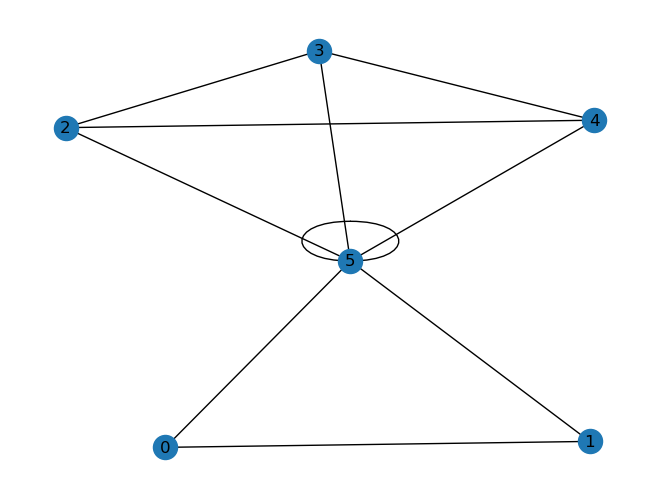

In [ ]:
q_mat, part = get_least_cell_quotient(others[1])
permuted, perm = permute_matrix_by_partition(others[1], part)
nx.draw(nx.from_numpy_array(permuted), with_labels=True)

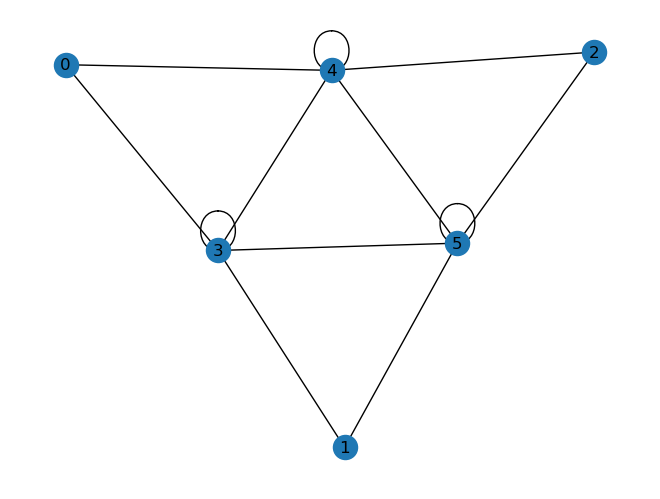

In [ ]:
q_mat, part = get_least_cell_quotient(others[0])
permuted, perm = permute_matrix_by_partition(others[0], part)
nx.draw(nx.from_numpy_array(permuted), with_labels=True)

In [ ]:
q_mat

array([[0., 2.],
       [2., 3.]])

In [ ]:
others[0]

array([[0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1]])

# Analysis on this graph where the block C_12 is not complete

This is an edge case because the eigenvalues produce by the quotient includes the all the eigenvalues except the smallest one.

In [ ]:
why = np.array([[0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 1],
                [1, 0, 0, 1, 1, 1],
                [0, 1, 0, 1, 1, 1],
                [0, 0, 1, 1, 1, 1]])

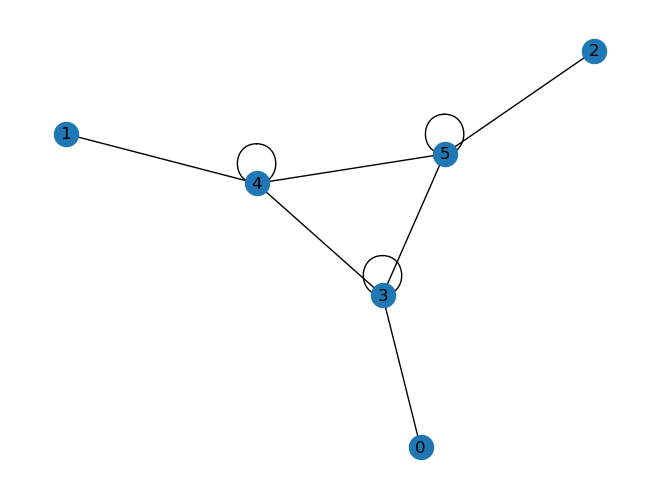

In [ ]:
nx.draw(nx.from_numpy_array(why), with_labels=True)

In [ ]:
unique_eigenvalues = np.unique(np.linalg.eigvalsh(why))

In [ ]:
unique_eigenvalues

array([-1.        , -1.        , -0.30277564,  1.        ,  1.        ,
        3.30277564])

In [ ]:
q_mat, part = get_least_cell_quotient(why)
permuted, perm = permute_matrix_by_partition(why, part)

In [ ]:
q_mat

array([[0., 1.],
       [1., 3.]])

In [ ]:
np.unique(np.linalg.eigvalsh(q_mat))

array([-0.30277564,  3.30277564])

In [ ]:
np.linalg.eigh(np.array([[0, 2], [2, 3]]))

EighResult(eigenvalues=array([-1.,  4.]), eigenvectors=array([[-0.89442719,  0.4472136 ],
       [ 0.4472136 ,  0.89442719]]))